In [5]:
import geopandas as gpd
import neatnet

KeyError: '__reduce_cython__'

In [4]:
gdf = gpd.read_file("../data/raw/2026-01-22-cykelknudepunktsstraekninger.gpkg")
gdf.head()

DataSourceError: ../data/raw/2026-01-22-cykelknudepunktsstraekninger.gpkg: No such file or directory

In [3]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [3]:
proj_crs = "EPSG:25832"

In [4]:
gdf = gdf[["geometry"]].copy()
gdf = gdf.to_crs(proj_crs)

<Axes: >

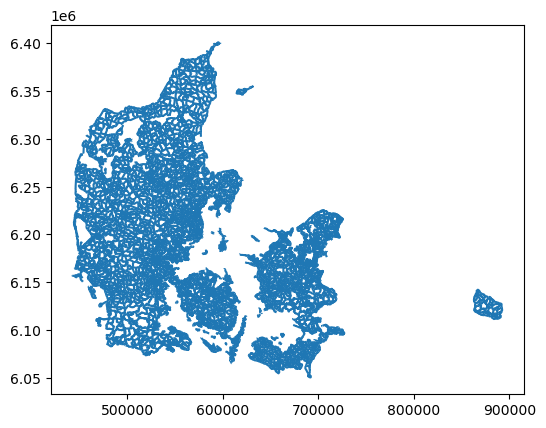

In [6]:
gdf.plot()

In [8]:
gdf_simplified = neatnet.neatify(gdf)

/Users/jqz304/miniconda3/envs/bikenwloops/lib/python3.12/site-packages/neatnet/nodes.py:531: UserWarning: Unable to sort modes: '<' not supported between instances of 'Point' and 'Point'
  mode = loop_points.loc[loop_points_ix].geometry.mode()
/Users/jqz304/miniconda3/envs/bikenwloops/lib/python3.12/site-packages/neatnet/nodes.py:539: UserWarning: Unable to sort modes: '<' not supported between instances of 'Point' and 'Point'
  new_mode = loop_points.loc[loop_points_ix].geometry.mode()
/Users/jqz304/miniconda3/envs/bikenwloops/lib/python3.12/site-packages/neatnet/nodes.py:531: UserWarning: Unable to sort modes: '<' not supported between instances of 'Point' and 'Point'
  mode = loop_points.loc[loop_points_ix].geometry.mode()
/Users/jqz304/miniconda3/envs/bikenwloops/lib/python3.12/site-packages/neatnet/nodes.py:539: UserWarning: Unable to sort modes: '<' not supported between instances of 'Point' and 'Point'
  new_mode = loop_points.loc[loop_points_ix].geometry.mode()
/Users/jqz304/mi

In [12]:
from collections import Counter

Counter(gdf_simplified._status)

Counter({'original': 7821, 'changed': 3064, 'new': 1064, nan: 5})

<Axes: >

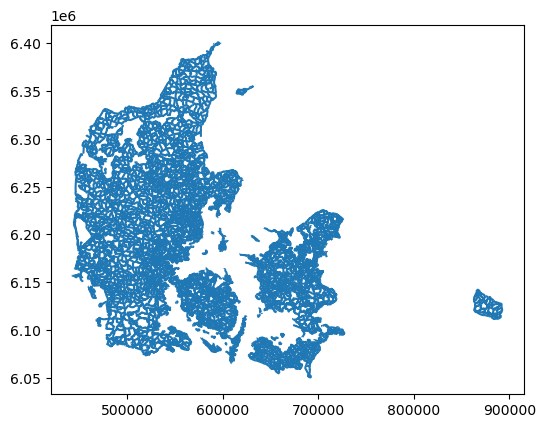

In [13]:
gdf_simplified.plot()

In [14]:
gdf_simplified.to_file("gdf_simplified.gpkg", index=None)

***

Second try

In [5]:
import shapely

In [19]:
linestrings = (
    gdf.geometry
)  # our geopandas.GeoSeries of linestrings representing street network
collection = shapely.GeometryCollection(linestrings.array)  # combine to a single object
noded = shapely.node(collection)  # add missing nodes
noded_linestrings = gpd.GeoSeries(noded).explode(ignore_index=True)
gdf_noded = gpd.GeoDataFrame({"geometry": noded_linestrings}, crs=proj_crs)
gdf_noded.head()

geometry
0  LINESTRING (551311.9 6256896.6, 551311.9 62568...
1  LINESTRING (551311.9 6256896.6, 551307.433 625...
2  LINESTRING (551204.81 6256549.05, 551204.85 62...
3  LINESTRING (551311.9 6256896.6, 551311.9 62568...
4  LINESTRING (552791.07 6254142.82, 552811.43 62...

In [29]:
len(gdf_noded)

23574

In [30]:
gdf_noded_interstitial = neatnet.remove_interstitial_nodes(gdf_noded)

/Users/jqz304/miniconda3/envs/bikenwloops/lib/python3.12/site-packages/neatnet/nodes.py:531: UserWarning: Unable to sort modes: '<' not supported between instances of 'Point' and 'Point'
  mode = loop_points.loc[loop_points_ix].geometry.mode()
/Users/jqz304/miniconda3/envs/bikenwloops/lib/python3.12/site-packages/neatnet/nodes.py:539: UserWarning: Unable to sort modes: '<' not supported between instances of 'Point' and 'Point'
  new_mode = loop_points.loc[loop_points_ix].geometry.mode()


In [31]:
gdf_simplified_2 = neatnet.neatify(gdf_noded_interstitial)

/Users/jqz304/miniconda3/envs/bikenwloops/lib/python3.12/site-packages/neatnet/nodes.py:531: UserWarning: Unable to sort modes: '<' not supported between instances of 'Point' and 'Point'
  mode = loop_points.loc[loop_points_ix].geometry.mode()
/Users/jqz304/miniconda3/envs/bikenwloops/lib/python3.12/site-packages/neatnet/nodes.py:539: UserWarning: Unable to sort modes: '<' not supported between instances of 'Point' and 'Point'
  new_mode = loop_points.loc[loop_points_ix].geometry.mode()
/Users/jqz304/miniconda3/envs/bikenwloops/lib/python3.12/site-packages/neatnet/nodes.py:531: UserWarning: Unable to sort modes: '<' not supported between instances of 'Point' and 'Point'
  mode = loop_points.loc[loop_points_ix].geometry.mode()
/Users/jqz304/miniconda3/envs/bikenwloops/lib/python3.12/site-packages/neatnet/nodes.py:539: UserWarning: Unable to sort modes: '<' not supported between instances of 'Point' and 'Point'
  new_mode = loop_points.loc[loop_points_ix].geometry.mode()
/Users/jqz304/mi

In [32]:
gdf_simplified_2.to_file("simp2.gpkg", index=False)